In [1]:
from gensim.models import Word2Vec
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



In [2]:
# model_100d_5e = Word2Vec.load("../Data/best_model_100_dim_5e.model")
# model_300d = Word2Vec.load("../Data/Models/best_model_new.model")
# model = Word2Vec.load("../Data/model_10000e_100d_lowest_loss.model")
model = Word2Vec.load("../Data/model_5e_100d.model")
# model = Word2Vec.load("../Data/model_5e_20d.model")

In [370]:
model.wv.similar_by_key('Rued Langgaards Vej')

[('Krokodillegade', 0.941950261592865),
 ('Gunløgsgade', 0.929219663143158),
 ('Smørumvej', 0.9236794114112854),
 ('Dæmningen', 0.9234192967414856),
 ('Vennemindevej', 0.9221628308296204),
 ('Fælledparken Skatepark', 0.9207092523574829),
 ('Mosesvinget', 0.9200780391693115),
 ('Det Nye Emdrupborg Kollegium', 0.9198076128959656),
 ('Dyssegårdsvej', 0.918389618396759),
 ('Adolph Steens Alle', 0.9172426462173462)]

In [371]:
names   = ['Rued Langgaards Vej', 
          'København H',
         'København H (Metro)', 
         'Nørreport St. (Metro)', 
         'Nørreport St.'
        ]

vectors = np.concatenate((model.wv["Rued Langgaards Vej"], 
                         model.wv['København H'],
                         model.wv['København H (Metro)'],
                         model.wv['Nørreport St. (Metro)'],
                         model.wv['Nørreport St.']
                        ), axis=0)

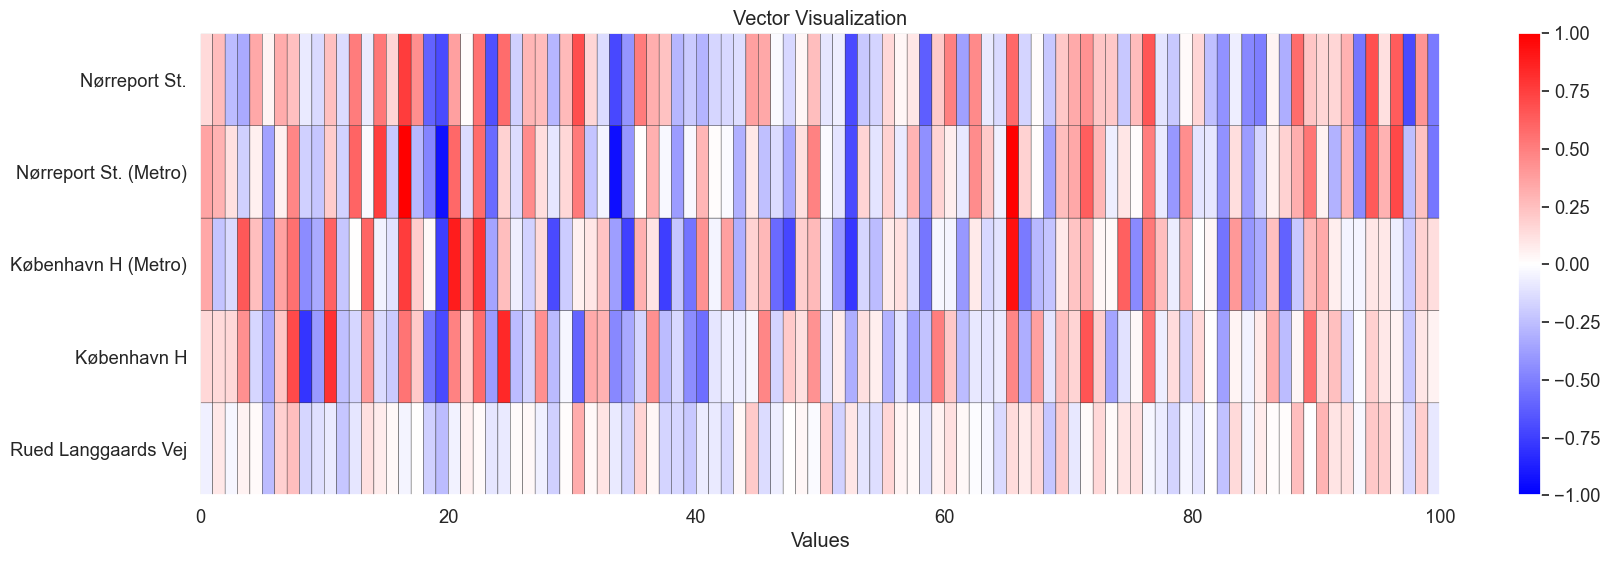

In [372]:
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)

# Create a figure and a single subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Create a pseudocolor plot with a single row (corresponding to the vector) and 10 columns
c = ax.pcolor(vectors.reshape(len(names), -1), cmap=cmap, vmin=-1, vmax=1, edgecolors='k')

# Set the ticks and labels for the y-axis
ax.set_yticks(np.arange(len(names)) + 0.5)
ax.set_yticklabels(names)

# Set the title and labels
ax.set_title('Vector Visualization')
ax.set_xlabel('Values')

# Show the colorbar
plt.colorbar(c, ax=ax)

# Display the plot
plt.show()


In [373]:
names_metro = []

vectors_metro = []

for location in model.wv.index_to_key:
    if location.__contains__("(Metro)"):
        names_metro.append(location)
        vectors_metro.append(model.wv[location])

for location in model.wv.index_to_key:
    if location.__contains__("St.") and location not in names_metro :
        names_metro.append(location)
        vectors_metro.append(model.wv[location])


vectors_metro = np.array(vectors_metro)

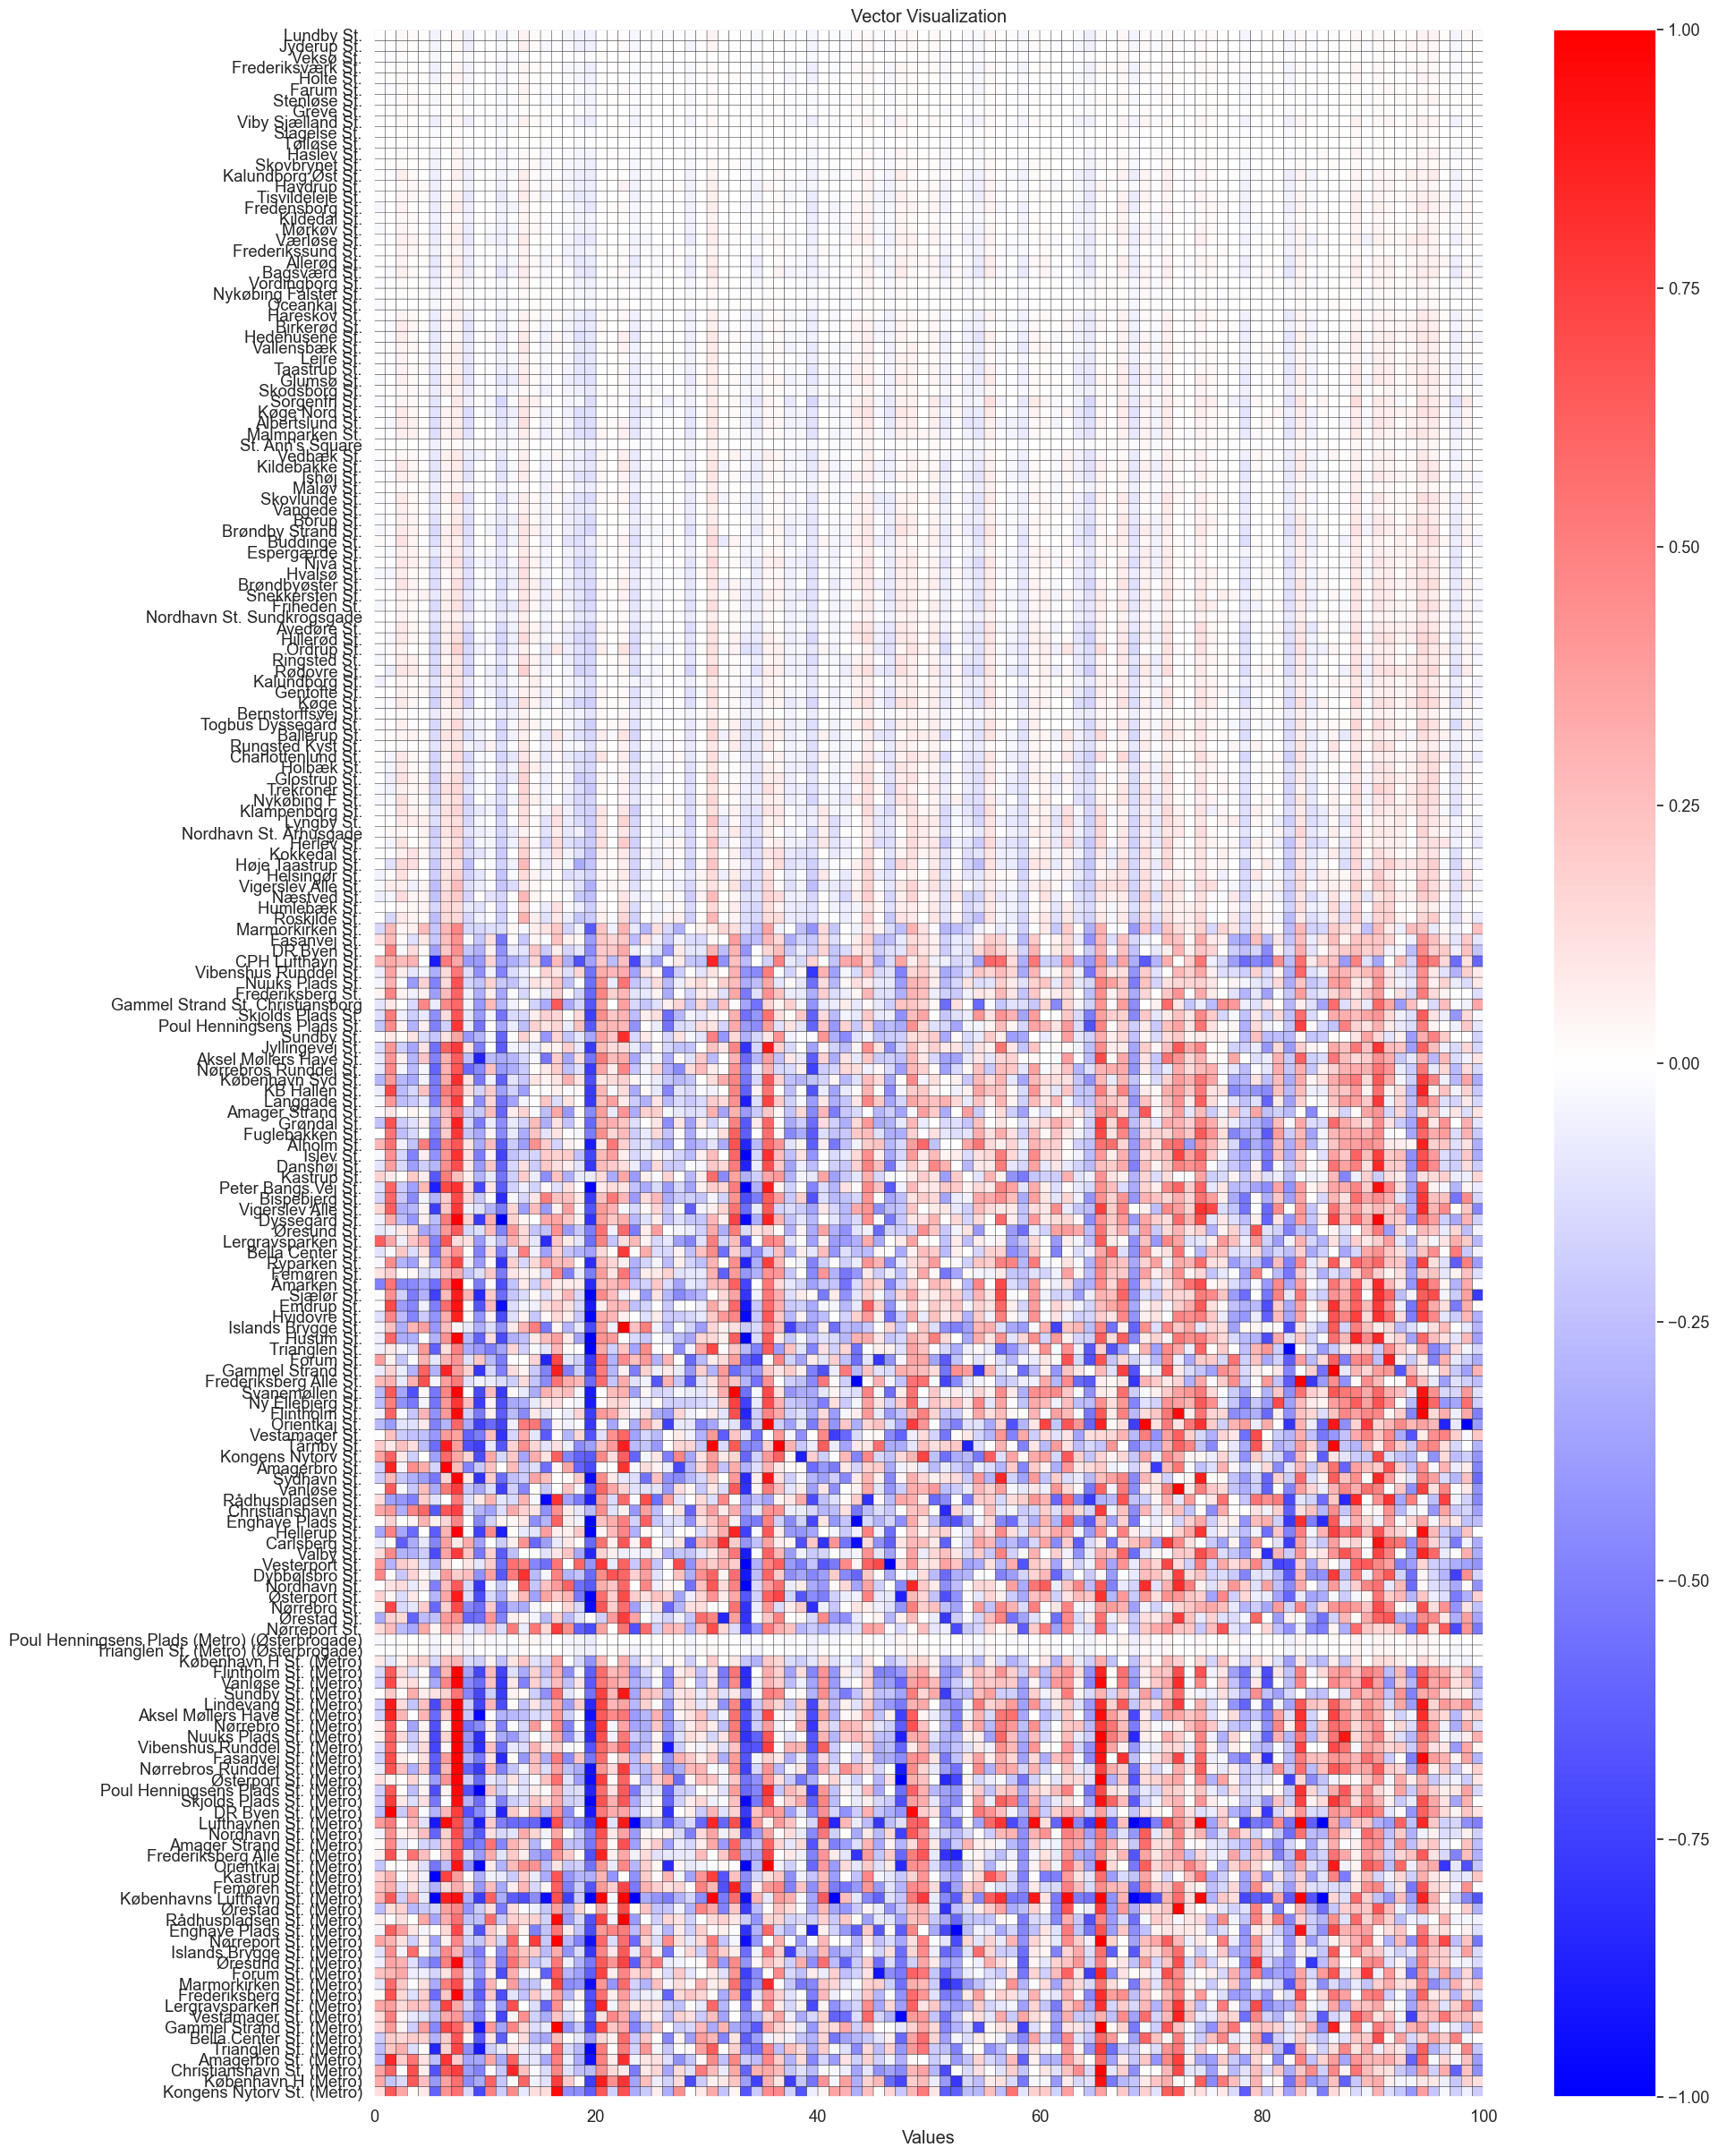

In [374]:
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)

# Create a figure and a single subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 30))

# Create a pseudocolor plot with a single row (corresponding to the vector) and 10 columns
c = ax.pcolor(vectors_metro.reshape(len(names_metro), -1), cmap=cmap, vmin=-1, vmax=1, edgecolors='k')

# Set the ticks and labels for the y-axis
ax.set_yticks(np.arange(len(names_metro)) + 0.5)
ax.set_yticklabels(names_metro)

# Set the title and labels
ax.set_title('Vector Visualization')
ax.set_xlabel('Values')

# Show the colorbar
plt.colorbar(c, ax=ax)

# Display the plot
plt.show()

In [375]:
names_similar_Rued = []
vectors_similar_Rued = []


for similar in model.wv.most_similar('Æblehaven'):
    location = similar[0]
    names_similar_Rued.append(location)
    vectors_similar_Rued.append(model.wv[location])

vectors_similar_Rued = np.array(vectors_similar_Rued)

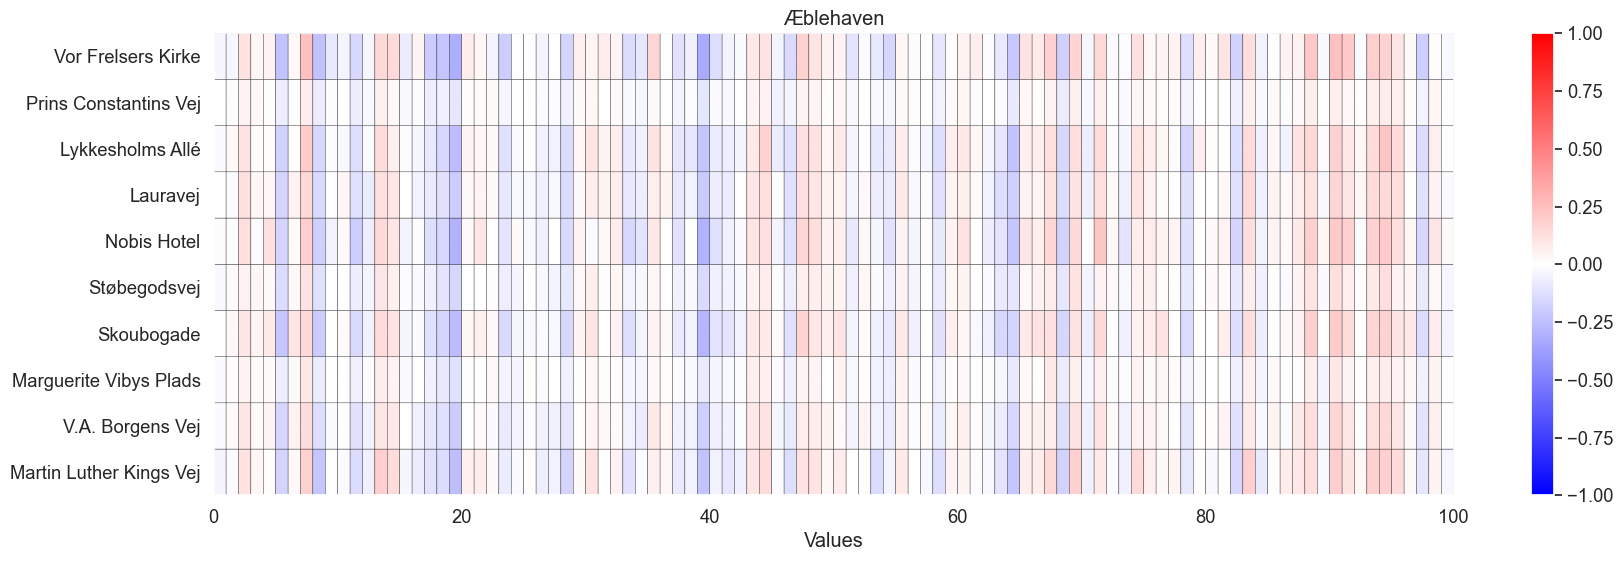

In [376]:
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)

# Create a figure and a single subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Create a pseudocolor plot with a single row (corresponding to the vector) and 10 columns
c = ax.pcolor(vectors_similar_Rued.reshape(len(names_similar_Rued), -1), cmap=cmap, vmin=-1, vmax=1, edgecolors='k')

# Set the ticks and labels for the y-axis
ax.set_yticks(np.arange(len(names_similar_Rued)) + 0.5)
ax.set_yticklabels(names_similar_Rued)

# Set the title and labels
ax.set_title('Æblehaven')
ax.set_xlabel('Values')

# Show the colorbar
plt.colorbar(c, ax=ax)

# Display the plot
plt.show()

In [377]:
# for l in model.wv.similar_by_key('Æblehaven', topn=4000):
#         if l[0].__contains__("København"):
#             print(l)

print("----")
for l in model.wv.similar_by_key('Rued Langgaards Vej', topn=4000):
    mag = np.linalg.norm(model.wv[l[0]])
    if mag > 2.5:
        print(l)
# print("----")
# for l in model.wv.similar_by_key('IT-Universitetet i København', topn=4000):
#         # if l[0].__contains__("useum"):
#             print(l)

----
('Vigerslev Kirke', 0.8653741478919983)
('Eversvej', 0.770453929901123)
('Hvidovregade', 0.7603089213371277)
('Hans Knudsens Plads', 0.7528494000434875)
('Mågevej', 0.7460322380065918)
('Frederiksberg Rådhus', 0.7398387789726257)
('KB Hallen', 0.7395952939987183)
('Ryparken', 0.7343297004699707)
('Rovsingsgade', 0.734133243560791)
('Jyllingevej St.', 0.7271232008934021)
('Lyngbyvej', 0.7218019366264343)
('Arkaderne', 0.720761239528656)
('Grønjords Kollegiet', 0.7164514064788818)
('København Syd St.', 0.7160740494728088)
('Borups Allé', 0.7158451080322266)
('Emdrup Torv', 0.7120081186294556)
('Borups Plads', 0.7112246751785278)
('Islev St.', 0.7105416655540466)
('Åfløjen', 0.704021692276001)
('Langgade St.', 0.7024644017219543)
('Tuborgvej', 0.7014358639717102)
('Emdrup St.', 0.6987815499305725)
('Hvidovre St.', 0.6977161765098572)
('C.F. Richs Vej', 0.6960089802742004)
('Lygten', 0.6948851346969604)
('Danshøj St.', 0.6923635005950928)
('Dyssegård St.', 0.6911357641220093)
('Husumv

In [384]:
print(model.wv['IT-Universitetet i København'])
print(np.linalg.norm(model.wv['IT-Universitetet i København']))

[-6.87289461e-02  9.17104334e-02  8.76849145e-02  7.79775456e-02
  1.89760476e-02 -2.82602042e-01  7.11864159e-02  1.91027477e-01
 -1.71685860e-01 -5.66568784e-03 -9.56340358e-02 -2.14902610e-01
 -4.45805602e-02  1.17615044e-01  1.46320224e-01 -3.38918641e-02
 -4.80456315e-02 -8.68262127e-02 -1.30641267e-01 -2.87092865e-01
  3.08376667e-03  4.68417555e-02  2.44034808e-02 -1.22400574e-01
 -7.28766918e-02 -5.56129671e-05 -1.33066148e-01 -3.17300297e-02
 -1.40019387e-01  8.89838114e-03  1.76186413e-01  1.51665621e-02
  5.85003495e-02 -4.20898460e-02 -1.33767396e-01  1.15083963e-01
  3.96751501e-02 -1.09925337e-01 -7.93145224e-02 -2.63259143e-01
 -1.34136463e-02 -1.01226181e-01 -1.42774358e-01  1.10969253e-01
  1.78523436e-01 -3.63574252e-02 -1.19892828e-01  9.23604891e-02
  9.76890102e-02  1.71072260e-02  1.14819840e-01 -9.11683813e-02
  5.58976419e-02 -1.49842367e-01 -8.04996118e-02  1.33950979e-01
 -3.62163782e-02  7.76519161e-03 -1.48422584e-01  8.82053971e-02
  4.60091345e-02  1.48074

In [3]:
metro_list = []

for metro in model.wv.index_to_key:
    if metro.__contains__('(Metro)'):
        if metro.__contains__('Østerbrogade'):
            continue
        if metro == 'København H (Metro)':
            continue
        metro_list.append(metro)

In [434]:
m12 = ['Vanløse St. (Metro)'
,'Flintholm St. (Metro)'
,'Lindevang St. (Metro)'
,'Fasanvej St. (Metro)'
,'Frederiksberg St. (Metro)'
,'Forum St. (Metro)'
,'Nørreport St. (Metro)'
,'Kongens Nytorv St. (Metro)'
,'Christianshavn St. (Metro)']

m1 = ['Islands Brygge St. (Metro)',
'DR Byen St. (Metro)',
'Sundby St. (Metro)',
'Bella Center St. (Metro)',
'Ørestad St. (Metro)',
'Vestamager St. (Metro)']

m2 = ['Amagerbro St. (Metro)'
,'Lergravsparken St. (Metro)'
,'Øresund St. (Metro)'
,'Amager Strand St. (Metro)'
,'Femøren St. (Metro)'
,'Kastrup St. (Metro)'
,'Lufthavnen St. (Metro)']

m3 = ['København H St. (Metro)'
,'Rådhuspladsen St. (Metro)'
,'Gammel Strand St. (Metro)'
,'Kongens Nytorv St. (Metro)'
,'Marmorkirken St. (Metro)'
,'Østerport St. (Metro)'
,'Trianglen St. (Metro)'
,'Poul Henningsens Plads St. (Metro)'
,'Vibenshus Runddel St. (Metro)'
,'Skjolds Plads St. (Metro)'
,'Nørrebro St. (Metro)'
,'Nørrebros Runddel St. (Metro)'
,'Nuuks Plads St. (Metro)'
,'Aksel Møllers Have St. (Metro)'
,'Frederiksberg St. (Metro)'
,'Frederiksberg Allé St. (Metro)'
,'Enghave Plads St. (Metro)'
]


metro_similarity_list = []
for location in metro_list:
    temp = []
    for w2 in metro_list:
        if w2.__contains__('Østerbrogade'):
            continue
        temp.append(model.wv.similarity(location, w2))
    if location in m12 and location in m3:
        location = location + " (M1,2 & M3)"
    if location in m12:
        location = location + " (M1,2)"
    if location in m1:
        location = location + " (M1)"
    if location in m2:
        location = location + " (M2)"
    if location in m3:
        location = location + " (M3)"
    metro_similarity_list.append([location, temp])
    # temp = model.wv.similar_by_key(location)
    # for sim, score in temp:
    #     if sim.__contains__('(Metro)'):
    #         print(f"{location} have the similar {sim} with a score of {score}")


In [20]:
m12 = ['Vanløse St. (Metro)'
,'Flintholm St. (Metro)'
,'Lindevang St. (Metro)'
,'Fasanvej St. (Metro)'
,'Frederiksberg St. (Metro)'
,'Forum St. (Metro)'
,'Nørreport St. (Metro)'
,'Kongens Nytorv St. (Metro)'
,'Christianshavn St. (Metro)']

m1 = ['Islands Brygge St. (Metro)',
'DR Byen St. (Metro)',
'Sundby St. (Metro)',
'Bella Center St. (Metro)',
'Ørestad St. (Metro)',
'Vestamager St. (Metro)']

m2 = ['Amagerbro St. (Metro)'
,'Lergravsparken St. (Metro)'
,'Øresund St. (Metro)'
,'Amager Strand St. (Metro)'
,'Femøren St. (Metro)'
,'Kastrup St. (Metro)'
,'Lufthavnen St. (Metro)'
,'Københavns Lufthavn St. (Metro)']

m3 = ['København H St. (Metro)'
,'København H (Metro)'
,'Rådhuspladsen St. (Metro)'
,'Gammel Strand St. (Metro)'
,'Kongens Nytorv St. (Metro)'
,'Marmorkirken St. (Metro)'
,'Østerport St. (Metro)'
,'Trianglen St. (Metro)'
,'Poul Henningsens Plads St. (Metro)'
,'Vibenshus Runddel St. (Metro)'
,'Skjolds Plads St. (Metro)'
,'Nørrebro St. (Metro)'
,'Nørrebros Runddel St. (Metro)'
,'Nuuks Plads St. (Metro)'
,'Aksel Møllers Have St. (Metro)'
,'Frederiksberg St. (Metro)'
,'Frederiksberg Allé St. (Metro)'
,'Enghave Plads St. (Metro)'
]

m4 = ['København H St. (Metro)', 'Rådhuspladsen St. (Metro)', 'Gammel Strand St. (Metro)', 'Kongens Nytorv St. (Metro)', 'Marmorkirken St. (Metro)', 'Østerport St. (Metro)',
    'Nordhavn St. (Metro)',
      'Orientkaj St. (Metro)']

metro_lines = [m12, m1, m2, m3, m4]

metro_similarity_list = []
# For each line in the metro_lines
for line in metro_lines:
    #For each location in a line
    for w1 in line:
        temp = []
        temp_line = ''
        if w1 in m12 and w1 in m3 and w1 in m4:
            temp_line = " (M1,2, M3 & M4)"
        elif w1 in m12 and w1 in m3:
            temp_line = " (M1,2 & M3)"
        elif w1 in m3 and w1 in m4:
            temp_line = " (M3 & M4)"
        elif w1 in m12:
            temp_line = " (M1,2)"
        elif w1 in m1:
            temp_line = " (M1)"
        elif w1 in m2:
            temp_line = " (M2)"
        elif w1 in m3:
            temp_line = " (M3)"
        elif w1 in m4:
            temp_line = " (M4)"
            
        #For each line in metro_lines
        for line2 in metro_lines:
                        #For each location in each line
            for w2 in line2:
                temp.append(model.wv.similarity(w1, w2))
        metro_similarity_list.append([str(w1 + temp_line), temp])
            

In [487]:

similarity_values = [item[1] for item in metro_similarity_list]

metro_list = [item[0] for item in metro_similarity_list]
len(metro_list)
(metro_list)



# metro_list = [item[0] for item in metro_similarity_list]
# similarity_values = [item[1] for item in metro_similarity_list]

# metro_list
# similarity_values

['Vanløse St. (Metro) (M1,2)',
 'Flintholm St. (Metro) (M1,2)',
 'Lindevang St. (Metro) (M1,2)',
 'Fasanvej St. (Metro) (M1,2)',
 'Frederiksberg St. (Metro) (M1,2 & M3)',
 'Forum St. (Metro) (M1,2)',
 'Nørreport St. (Metro) (M1,2)',
 'Kongens Nytorv St. (Metro) (M1,2 & M3)',
 'Christianshavn St. (Metro) (M1,2)',
 'Islands Brygge St. (Metro) (M1)',
 'DR Byen St. (Metro) (M1)',
 'Sundby St. (Metro) (M1)',
 'Bella Center St. (Metro) (M1)',
 'Ørestad St. (Metro) (M1)',
 'Vestamager St. (Metro) (M1)',
 'Amagerbro St. (Metro) (M2)',
 'Lergravsparken St. (Metro) (M2)',
 'Øresund St. (Metro) (M2)',
 'Amager Strand St. (Metro) (M2)',
 'Femøren St. (Metro) (M2)',
 'Kastrup St. (Metro) (M2)',
 'Lufthavnen St. (Metro) (M2)',
 'København H St. (Metro) (M3)',
 'Rådhuspladsen St. (Metro) (M3)',
 'Gammel Strand St. (Metro) (M3)',
 'Kongens Nytorv St. (Metro) (M1,2 & M3)',
 'Marmorkirken St. (Metro) (M3)',
 'Østerport St. (Metro) (M3)',
 'Trianglen St. (Metro) (M3)',
 'Poul Henningsens Plads St. (Metro

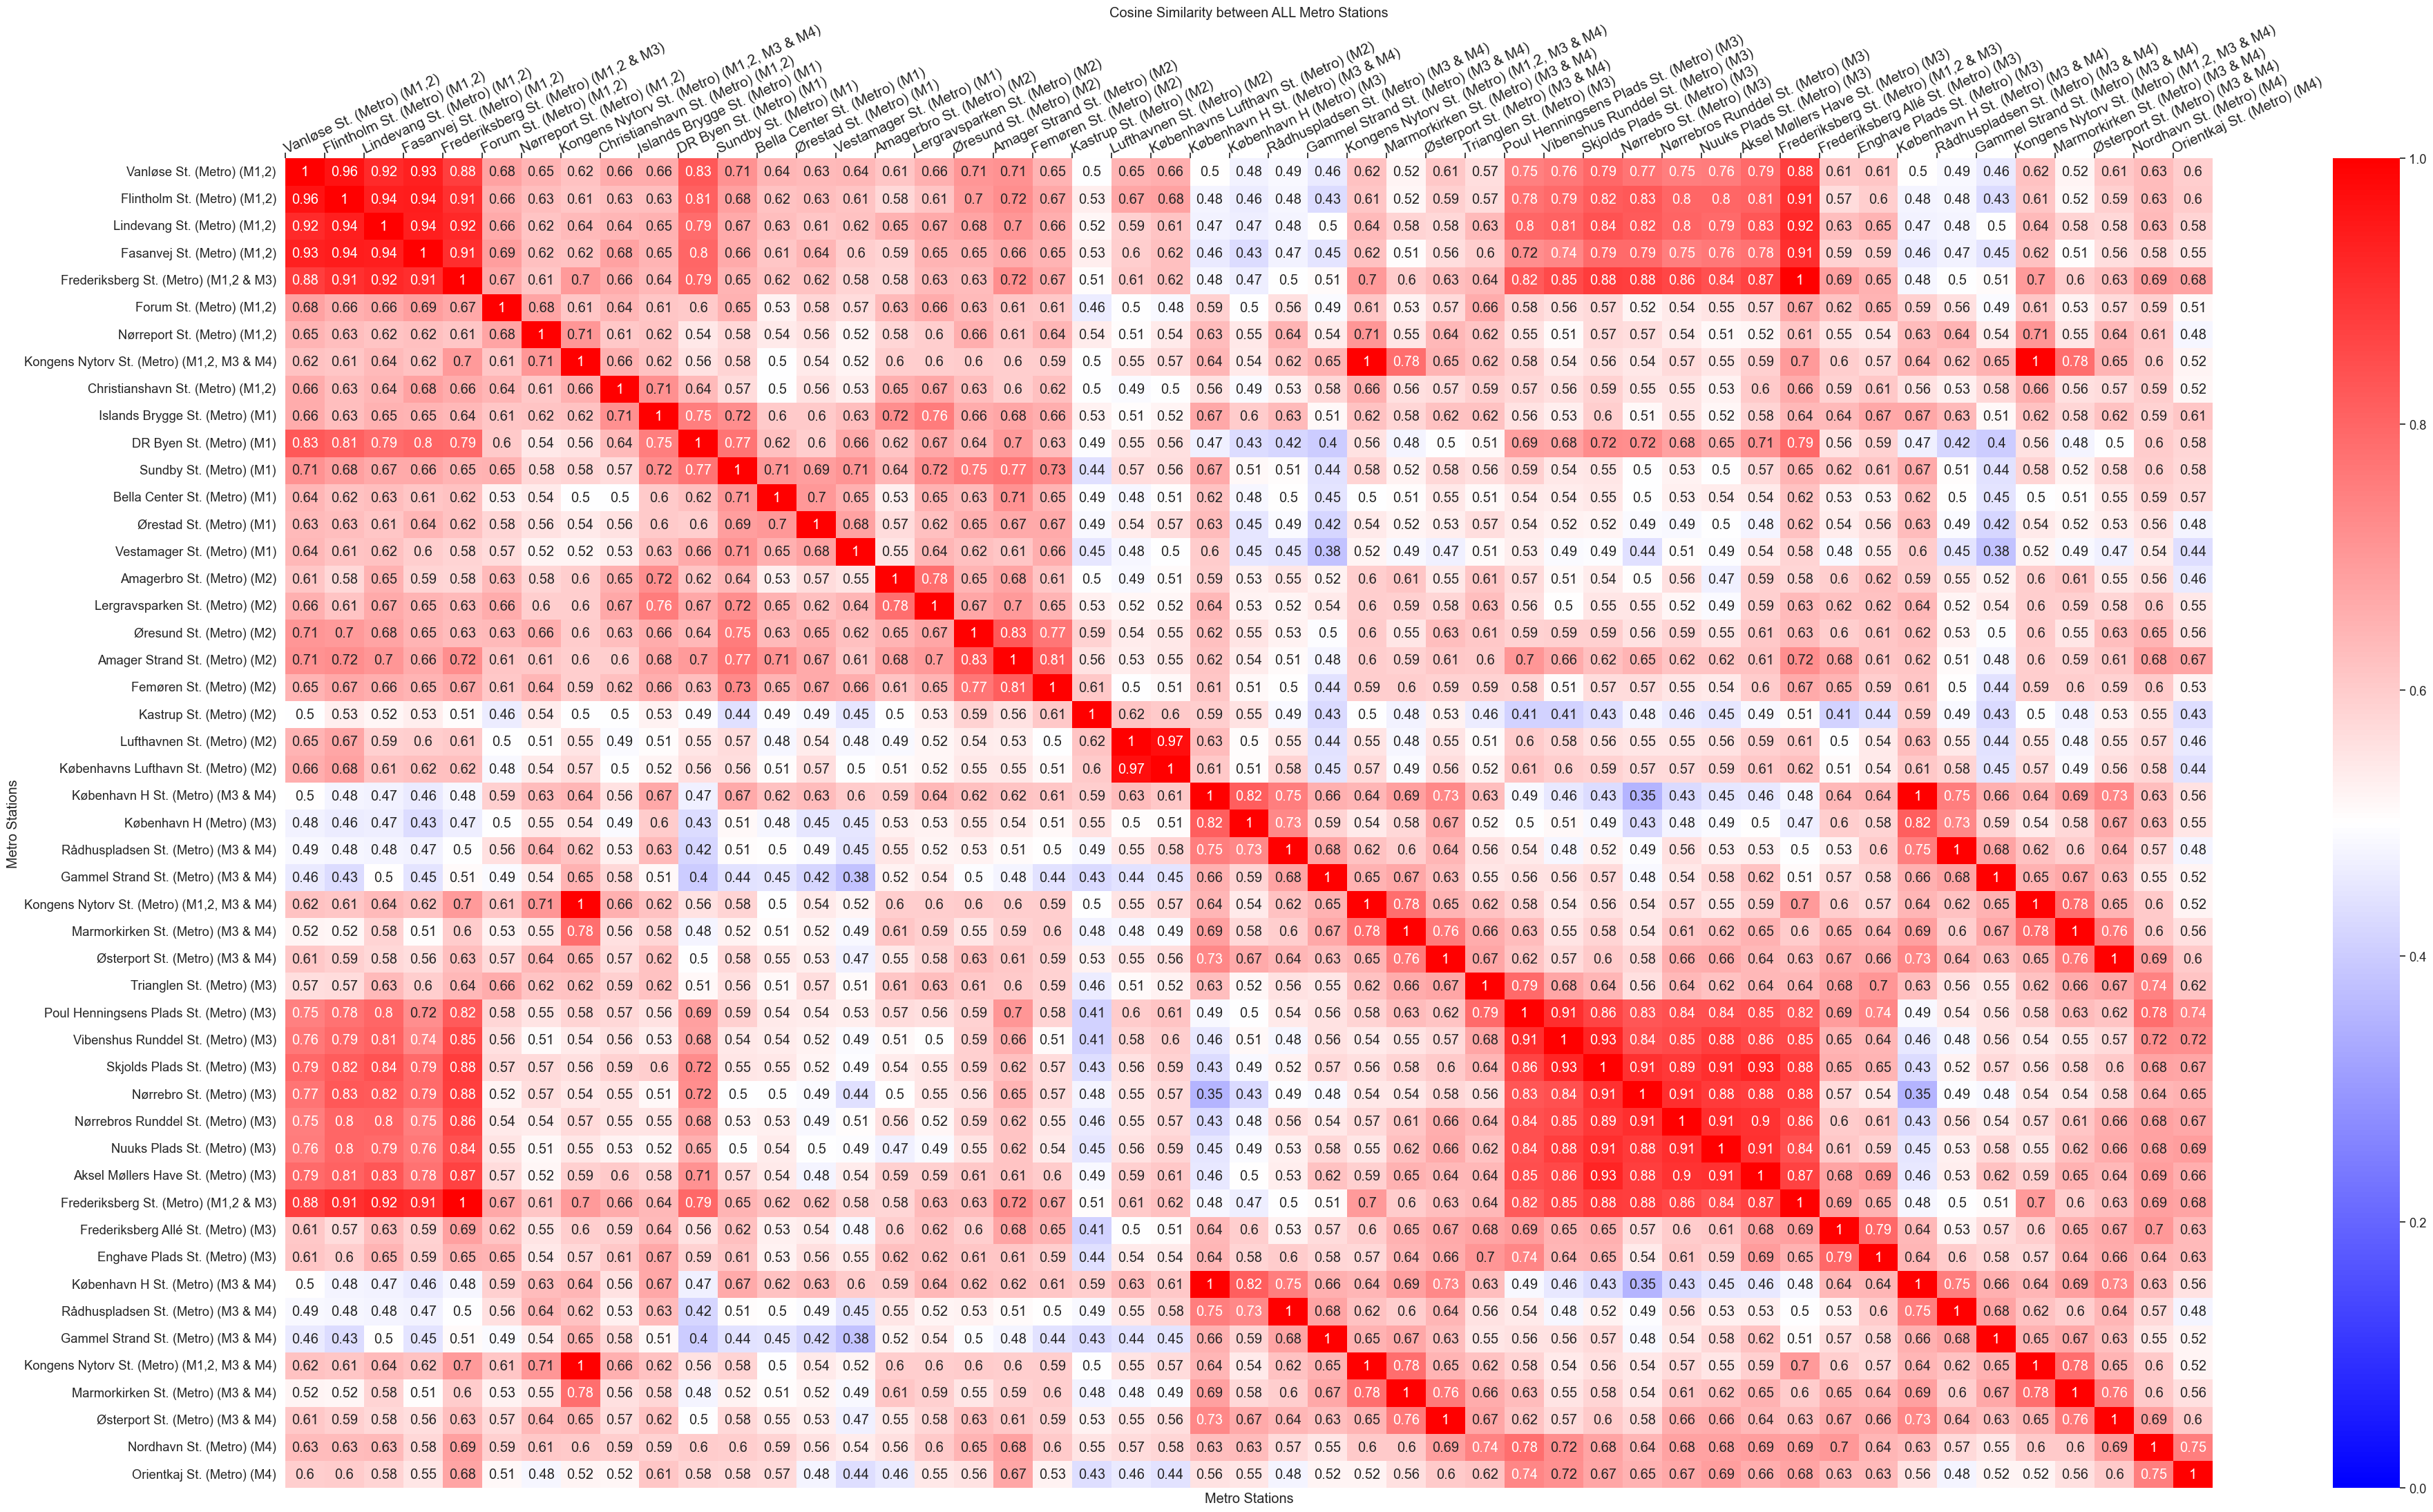

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)


metro_list = [item[0] for item in metro_similarity_list]
similarity_values = [item[1] for item in metro_similarity_list]
# metro_list = [item[0] for item in m1_list_sim]
# similarity_values = [item[1] for item in m1_list_sim]

# Create a heatmap using Seaborn
plt.figure(figsize=(45, 25))
sns.set_theme(font_scale=1.2)
heatmap = sns.heatmap(similarity_values, 
                      annot=True, 
                      xticklabels=False, yticklabels=metro_list, cmap=cmap, vmin=0, vmax=1)
plt.title('Cosine Similarity between ALL Metro Stations')
plt.xlabel('Metro Stations')
plt.ylabel('Metro Stations')
plt.xticks(ticks=range(len(metro_list)), labels=metro_list)
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=25, ha='left', va='center', fontsize=15, wrap=True)
plt.show()


In [383]:
model.wv.similarity('Vanløse St. (Metro)', 'Vanløse St. (Metro)')

0.99999994